In [15]:
docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [17]:
tokenizer.fit_on_texts(docs)

In [18]:
tokenizer.word_index

{'india': 1,
 'jeetega': 2,
 'hip': 3,
 'ki': 4,
 'jai': 5,
 'kohli': 6,
 'sachin': 7,
 'dhoni': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'modi': 14,
 'ji': 15,
 'inquilab': 16,
 'zindabad': 17}

In [19]:
print(f'Vocabulary size: {len(tokenizer.word_index)}')

Vocabulary size: 17


In [20]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [21]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

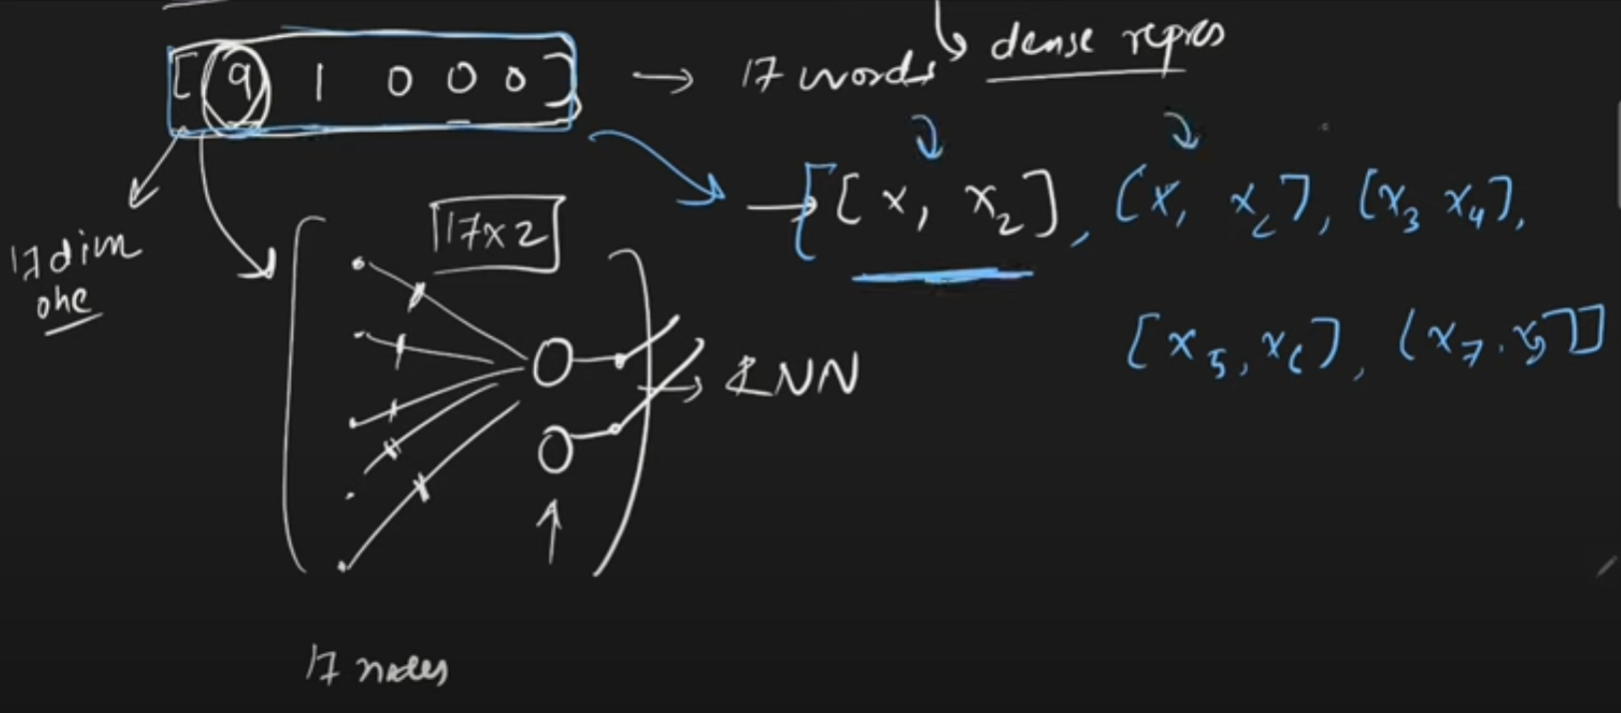

In [22]:
from keras import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=17, output_dim=2)) # 17-> vocab size, output_dim-> with how many values we want to represent a single word (Read top most SS),

# Manually build the model to define input shape
model.build(input_shape=(None, 50))  # (batch_size, sequence_length)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 2)               │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile('adam','accuracy')

# **for each sample, it will convert each integer into 2 dense vectors, the below is the representation of each sample**

In [24]:
pred = model.predict(sequences)
print(pred)

InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/embedding_2_1/GatherV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-24-3f46a817c7e2>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4875, in take

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1951, in take

indices[9,1] = 17 is not in [0, 17)
	 [[{{node sequential_2_1/embedding_2_1/GatherV2}}]] [Op:__inference_one_step_on_data_distributed_407]

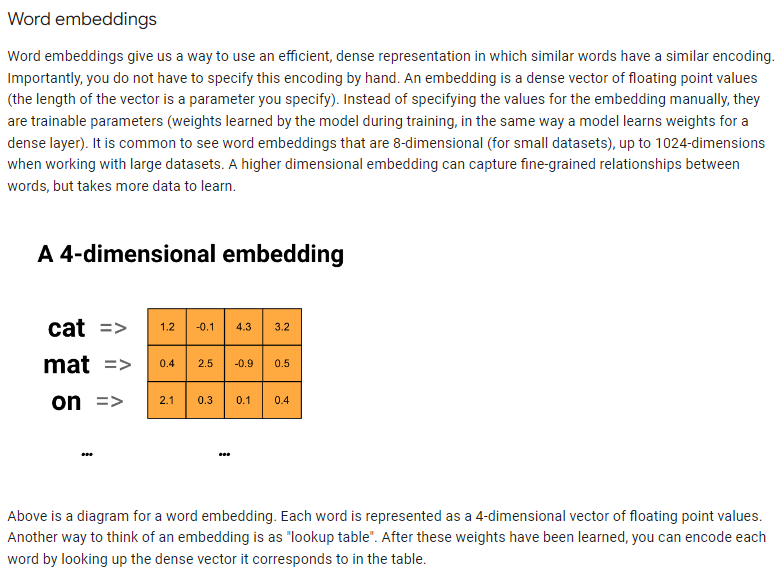

In [25]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [26]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
# Find the maximum index value in the training and test data
vocab_size = max([max(sequence) for sequence in X_train] + [max(sequence) for sequence in X_test]) + 1

print(f'Vocabulary Size: {vocab_size}')

Vocabulary Size: 88587


In [28]:
print(len(X_train[0]))
print(len(X_train[1]))

218
189


**we need to do padding to get consistent length**

In [29]:
X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

In [30]:
print(len(X_train[0]))
print(len(X_train[1]))

2494
2494


**2494 represents, sequence_length / time step**

In [31]:
X_train.shape

(25000, 2494)

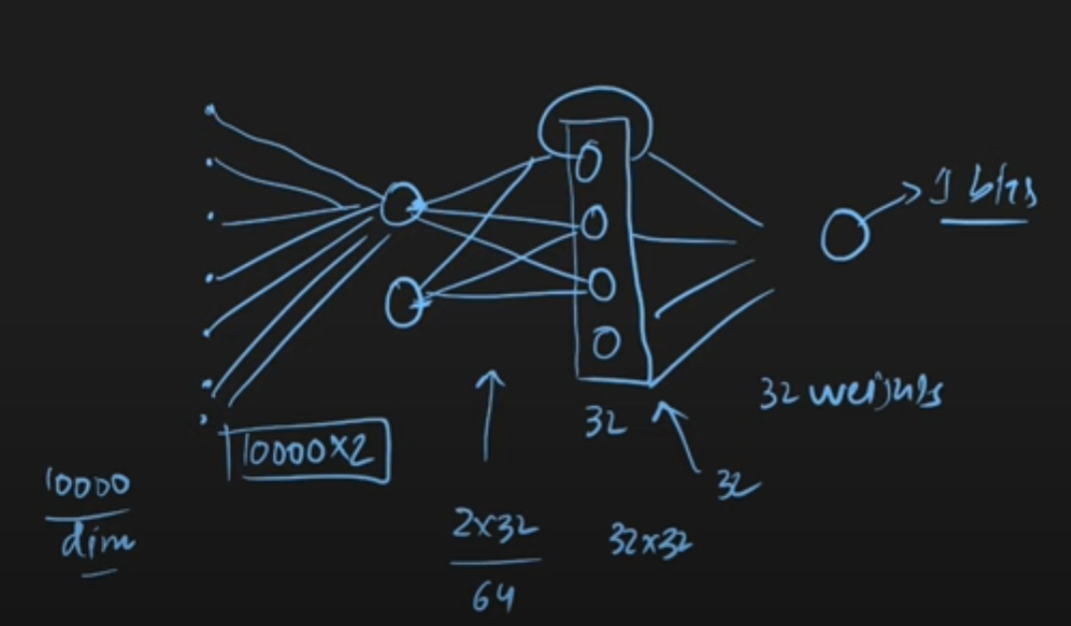

# **i have used the actual vocab size, but in the above SS, vocab size is taken as 10000**

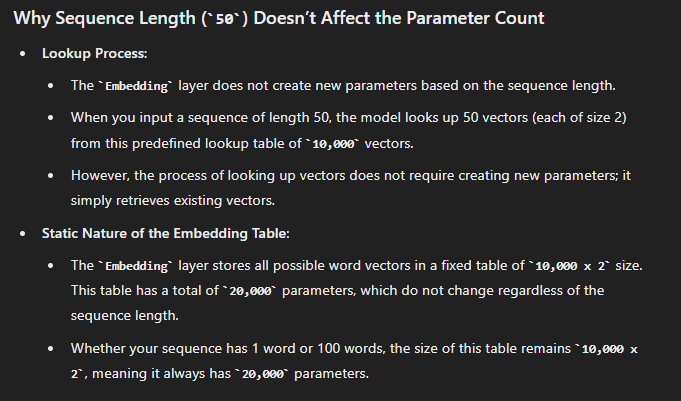

In [34]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim = 88587, output_dim = 2))  # 88586 is the vocab_size, 2 represents -> with how many values we want to represent each integer present in the sequence, 2494 represents -> length of sequence
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Manually build the model to define input shape
model.build(input_shape=(None, 2494))  # (batch_size, sequence_length or time_step)

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 2494, 2)             │         177,174 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,327 (696.59 KB)

 Trainable params: 178,327 (696.59 KB)

 Non-trainable params: 0 (0.00 B)

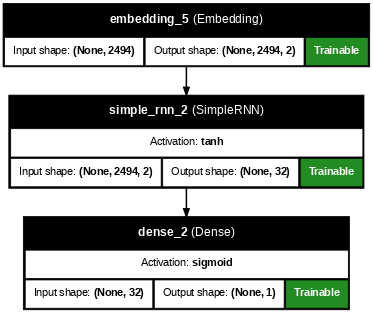

In [38]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file='multimodel.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=55,
    show_layer_activations=True,
    show_trainable=True
)

In [36]:
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test, y_test), batch_size = 1024)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - acc: 0.4981 - loss: 0.6939 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - acc: 0.4960 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6934
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - acc: 0.4974 - loss: 0.6935 - val_acc: 0.5000 - val_loss: 0.6935
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - acc: 0.5026 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - acc: 0.4978 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6932


In [39]:
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test, y_test), batch_size = 256)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - acc: 0.5032 - loss: 0.6936 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - acc: 0.4872 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - acc: 0.5017 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - acc: 0.4958 - loss: 0.6934 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - acc: 0.5046 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6932
